In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.datasets import load_iris

In [2]:
# Load the IRIS dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
# Simulate a time series by selecting one feature (e.g., petal length)
df['time'] = range(1, len(df) + 1)
df = df[['time', 'petal length (cm)']]
df.set_index('time', inplace=True)

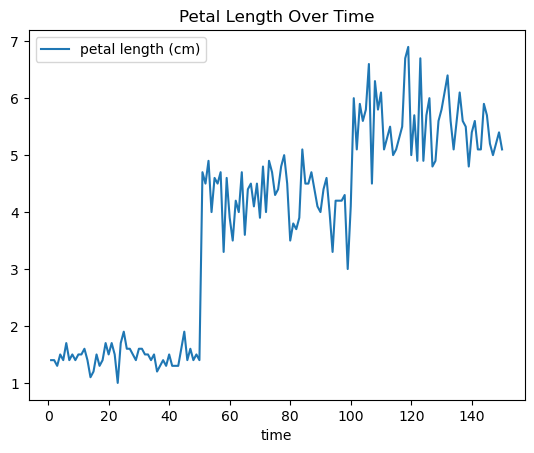

In [4]:
# Plot the time series
df.plot(title='Petal Length Over Time')
plt.show()

In [5]:
# Convert numerical index to datetime to avoid warnings
df['time'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
df.set_index('time', inplace=True)

In [6]:
# Fit ARIMA model
model = ARIMA(df, order=(2, 1, 2))  # Example order, can be tuned
model_fit = model.fit()

C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\sandh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [7]:
# Forecast future values
forecast = model_fit.forecast(steps=10)

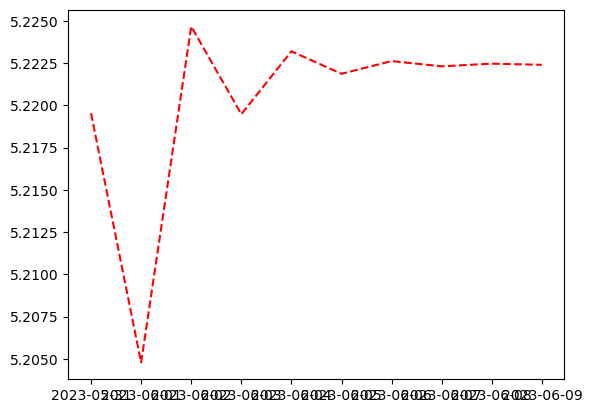

In [8]:
# Create future dates for the forecast
future_dates = pd.date_range(start=df.index[-1], periods=11, freq='D')[1:]

# Plot forecast with correct x-axis
plt.plot(future_dates, forecast, label='Forecast', linestyle='dashed', color='red')

In [9]:
# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:      petal length (cm)   No. Observations:                  150
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -135.330
Date:                Wed, 12 Mar 2025   AIC                            280.660
Time:                        21:08:30   BIC                            295.680
Sample:                    01-01-2023   HQIC                           286.762
                         - 05-30-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1515      0.982     -0.154      0.877      -2.077       1.774
ar.L2          0.1476      0.157      0.939      0.348      -0.161       0.456
ma.L1         -0.3627      0.988     -0.367      0.7